In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from PIL import Image
import warnings
import PIL.Image
warnings.filterwarnings(action='ignore')

In [24]:
# Train Image Load 함수
def load_CIFAR10(path):

    path = path
    images = []
    for filename in glob(path +"*"):
        #print(filename)
        for img in glob(filename):
            #print(img)
            an_img = PIL.Image.open(img) #read img
            img_array = np.array(an_img) #img to array
            images.append(img_array) #append array to training_images
    images = np.array(images)

    return images

In [44]:
# Train Image 시각화 함수
def show_image(image):
  img_rgb = image

  plt.figure(figsize=(10, 2))

  plt.subplot(141)
  plt.imshow(img_rgb[50:200, 50:200, :])
  plt.axis("off")
  plt.title("RGB Image")

  plt.subplot(142)
  plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.bone)
  plt.axis("off")
  plt.title("R channel")

  plt.subplot(143)
  plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.bone)
  plt.axis("off")
  plt.title("G channel")

  plt.subplot(144)
  plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.bone)
  plt.axis("off")
  plt.title("B channel")

  plt.show()

In [25]:
### Load Hand Language Dataset

In [48]:
from google.colab import drive
drive.mount('/content/gdrive')

PATH = "/content/gdrive/My Drive/Colab Notebooks/data/hand_language_dataset/"
image_label_df = pd.read_csv(PATH + 'train.csv') # Image의 Label 정보를 담고 있는 csv 파일 로드

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [47]:
df.head()

,file_name,label
0,001.png,10-2
1,002.png,10-1
2,003.png,3
3,004.png,8
4,005.png,9


### Load Training IMG

In [49]:
# 학습시킬 Image Data Load
training_images = load_CIFAR10(path= '/content/gdrive/My Drive/Colab Notebooks/data/hand_language_dataset/train/')

In [50]:
print("Image Shape: (count, high pixel, width pixel, channels)")
print("train 이미지 크기:", training_images.shape)
print("train 라벨 크기:", image_label_df.shape)


Image Shape: (count, high pixel, width pixel, channels)
train 이미지 크기: (858, 224, 224, 3)
train 라벨 크기: (858, 2)


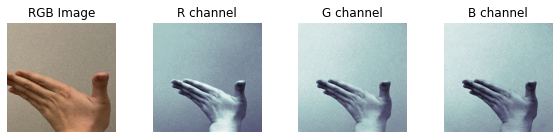

In [52]:
show_image(training_images[4])

# 데이터에 존재하는 Label 확인

In [54]:
print(np.unique(image_label_df.label))


['1' '10-1' '10-2' '2' '3' '4' '5' '6' '7' '8' '9']


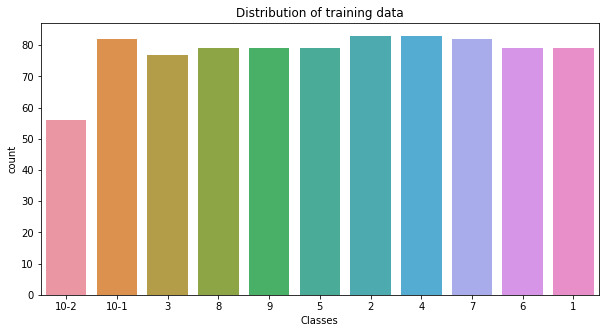

In [56]:
plt.figure(figsize=[10,5])
sns.countplot(image_label_df.label.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()

# 데이터에 Label Value 정수형으로 변환


In [58]:
image_label_df['label'][image_label_df['label'] == '10-1'] = 10 ## label : 10-1 -> 10
image_label_df['label'][image_label_df['label'] == '10-2'] = 0 ## Label : 10-2 -> 0
image_label_df['label'] = image_label_df['label'].apply(lambda x : int(x)) ## Dtype : object -> int

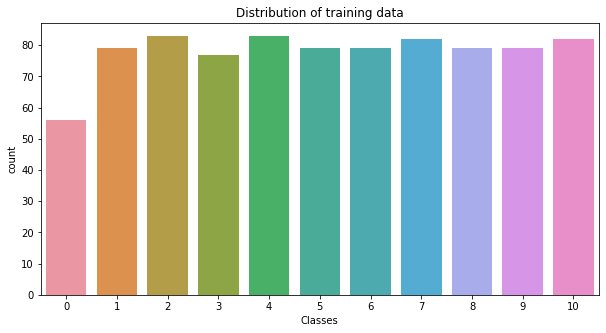

In [59]:
plt.figure(figsize=[10,5])
sns.countplot(image_label_df.label.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()

In [62]:
print(np.unique(image_label_df.label))


[ 0  1  2  3  4  5  6  7  8  9 10]
